In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1 : Extract the data
df = pd.read_csv("Bank_transactions_dirty.csv")

In [3]:
# Read the data
print("Original Data:\n")
df

Original Data:



,Transactionid,Accountid,Transactionamount,Transactiondate,Transactiontype,Location,Deviceid,Ip Address,Merchantid,Channel,Customerage,Customeroccupation,Transactionduration,Loginattempts,Accountbalance,Previoustransactiondate
0,TX002004,AC00388,248.76,5/24/2023 16:12,Debit,Denver,D000334,80.75.92.66,M091,ATM,18,Student,56,1,546.46,11/4/2024 8:06
1,TX000096,AC00010,508.68,6/26/2023 16:16,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,11/4/2024 8:09
2,TX001327,AC00453,109.91,5/1/2023 16:23,Debit,#####,D000517,173.135.78.201,M074,Branch,38,Doctor,90,1,12896.06,11/4/2024 8:10
3,TX000379,AC00410,295.5,11/23/2023 18:00,Debit,Mesa,D000445,137.135.250.168,M095,ATM,59,Retired,36,1,6280.66,11/4/2024 8:07
4,TX002294,AC00322,141.37,7/21/2023 16:54,Debit,Denver,D000119,52.196.112.199,M026,Online,46,Engineer,77,1,1019.77,11/4/2024 8:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,TX000560,AC00030,356.1,10/25/2023 16:13,Credit,Fort Worth,D000441,167.164.55.0,M043,Branch,26,Student,187,1,868.35,11/4/2024 8:11
2513,TX000573,AC00471,121.43,3/21/2023 16:20,Credit,Sacramento,D000244,171.101.134.74,M062,Branch,52,Engineer,243,1,"$7,365.28",11/4/2024 8:07
2514,TX001352,AC00335,315.94,2/27/2023 17:06,Credit,#####,D000625,8.244.162.185,M024,Branch,49,Doctor,172,1,7719.71,11/4/2024 8:12
2515,TX000372,AC00322,132.84,8/21/2023 16:28,Debit,Oklahoma City,D000244,147.114.91.132,M060,ATM,21,Student,143,1,822.73,11/4/2024 8:08


In [4]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Transactionid            2517 non-null   object
 1   Accountid                2517 non-null   object
 2   Transactionamount        2517 non-null   object
 3   Transactiondate          2517 non-null   object
 4   Transactiontype          2517 non-null   object
 5   Location                 2517 non-null   object
 6   Deviceid                 2517 non-null   object
 7   Ip Address               2517 non-null   object
 8   Merchantid               2517 non-null   object
 9   Channel                  2517 non-null   object
 10  Customerage              2517 non-null   int64 
 11  Customeroccupation       2517 non-null   object
 12  Transactionduration      2517 non-null   int64 
 13  Loginattempts            2517 non-null   int64 
 14  Accountbalance           2517 non-null  

In [5]:
df.isnull().sum()

Transactionid              0
Accountid                  0
Transactionamount          0
Transactiondate            0
Transactiontype            0
Location                   0
Deviceid                   0
Ip Address                 0
Merchantid                 0
Channel                    0
Customerage                0
Customeroccupation         0
Transactionduration        0
Loginattempts              0
Accountbalance             0
Previoustransactiondate    0
dtype: int64

In [6]:
# Step 2 : Transform the dataset
df.columns = [col.lower().strip().replace(" ","_") for col in df.columns]
df.replace("#####", np.nan, inplace=True)

In [7]:
for col in ['transactiondate','previoustransactiondate']:
    df[col] = pd.to_datetime(df[col], errors='coerce')
df.dropna(subset=['transactiondate', 'previoustransactiondate'], inplace=True)

In [8]:
# Remove $ sign from the amount column
df['transactionamount'] = df['transactionamount'].astype(str).str.replace(r'[\$,]', '', regex=True)

# Convert the cleaned string into numbers
df['transactionamount'] = pd.to_numeric(df['transactionamount'], errors='coerce')

In [9]:
df

,transactionid,accountid,transactionamount,transactiondate,transactiontype,location,deviceid,ip_address,merchantid,channel,customerage,customeroccupation,transactionduration,loginattempts,accountbalance,previoustransactiondate
0,TX002004,AC00388,248.76,2023-05-24 16:12:00,Debit,Denver,D000334,80.75.92.66,M091,ATM,18,Student,56,1,546.46,2024-11-04 08:06:00
1,TX000096,AC00010,508.68,2023-06-26 16:16:00,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:00
2,TX001327,AC00453,109.91,2023-05-01 16:23:00,Debit,#####,D000517,173.135.78.201,M074,Branch,38,Doctor,90,1,12896.06,2024-11-04 08:10:00
3,TX000379,AC00410,295.50,2023-11-23 18:00:00,Debit,Mesa,D000445,137.135.250.168,M095,ATM,59,Retired,36,1,6280.66,2024-11-04 08:07:00
4,TX002294,AC00322,141.37,2023-07-21 16:54:00,Debit,Denver,D000119,52.196.112.199,M026,Online,46,Engineer,77,1,1019.77,2024-11-04 08:11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,TX000560,AC00030,356.10,2023-10-25 16:13:00,Credit,Fort Worth,D000441,167.164.55.0,M043,Branch,26,Student,187,1,868.35,2024-11-04 08:11:00
2513,TX000573,AC00471,121.43,2023-03-21 16:20:00,Credit,Sacramento,D000244,171.101.134.74,M062,Branch,52,Engineer,243,1,"$7,365.28",2024-11-04 08:07:00
2514,TX001352,AC00335,315.94,2023-02-27 17:06:00,Credit,NaN,D000625,8.244.162.185,M024,Branch,49,Doctor,172,1,7719.71,2024-11-04 08:12:00
2515,TX000372,AC00322,132.84,2023-08-21 16:28:00,Debit,Oklahoma City,D000244,147.114.91.132,M060,ATM,21,Student,143,1,822.73,2024-11-04 08:08:00


In [16]:
# Step 3: Load the dataset
df.to_csv("Cleaned_bank_data.csv")

In [17]:
# Step 4: Feature Engineering
def add_features(df):
    df['transaction_hour'] = df['transactiondate'].dt.hour
    df['transaction_day'] = df['transactiondate'].dt.day_name()
    df['is_senior_citizen'] = df['customerage'].apply(lambda x: 1 if x >= 60 else 0)
    df['amount_category'] = pd.qcut(df['transactionamount'], q=3, labels=['Low', 'Medium', 'High'])
    return df

In [12]:
df = add_features(df)

In [14]:
df.head()

,transactionid,accountid,transactionamount,transactiondate,transactiontype,location,deviceid,ip_address,merchantid,channel,customerage,customeroccupation,transactionduration,loginattempts,accountbalance,previoustransactiondate,transaction_hour,transaction_day,is_senior_citizen,amount_category
0,TX002004,AC00388,248.76,2023-05-24 16:12:00,Debit,Denver,D000334,80.75.92.66,M091,ATM,18,Student,56,1,546.46,2024-11-04 08:06:00,16,Wednesday,0,Medium
1,TX000096,AC00010,508.68,2023-06-26 16:16:00,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:00,16,Monday,0,High
2,TX001327,AC00453,109.91,2023-05-01 16:23:00,Debit,#####,D000517,173.135.78.201,M074,Branch,38,Doctor,90,1,12896.06,2024-11-04 08:10:00,16,Monday,0,Low
3,TX000379,AC00410,295.50,2023-11-23 18:00:00,Debit,Mesa,D000445,137.135.250.168,M095,ATM,59,Retired,36,1,6280.66,2024-11-04 08:07:00,18,Thursday,0,Medium
4,TX002294,AC00322,141.37,2023-07-21 16:54:00,Debit,Denver,D000119,52.196.112.199,M026,Online,46,Engineer,77,1,1019.77,2024-11-04 08:11:00,16,Friday,0,Medium


In [15]:
def validate_data(df):
    if df.isnull().mean().mean() > 0.1:
        print("Warning: Too many missing values.")
    if df.duplicate().sum() > 0:
        print("Warning: Duplicate rows found.")
    return df.drop_duplicates()

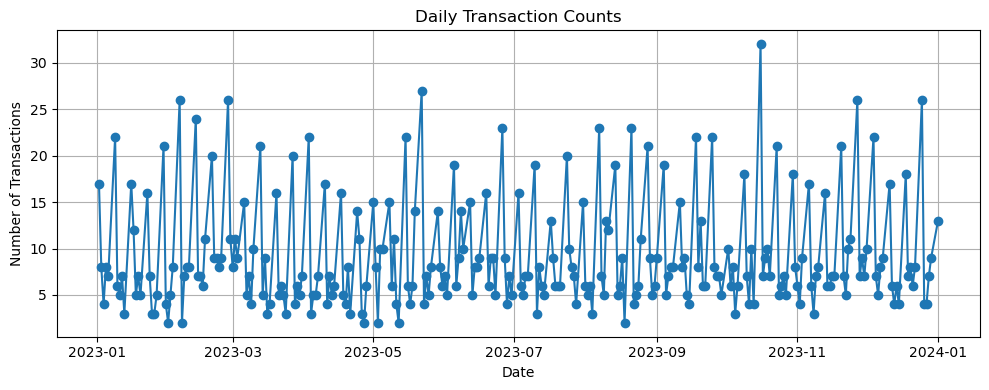

In [24]:
# Step 5: Visualiasation
# Daily Transaction counts
plt.figure(figsize=(10,4))
df['transactiondate'].dt.date.value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Daily Transaction Counts")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()

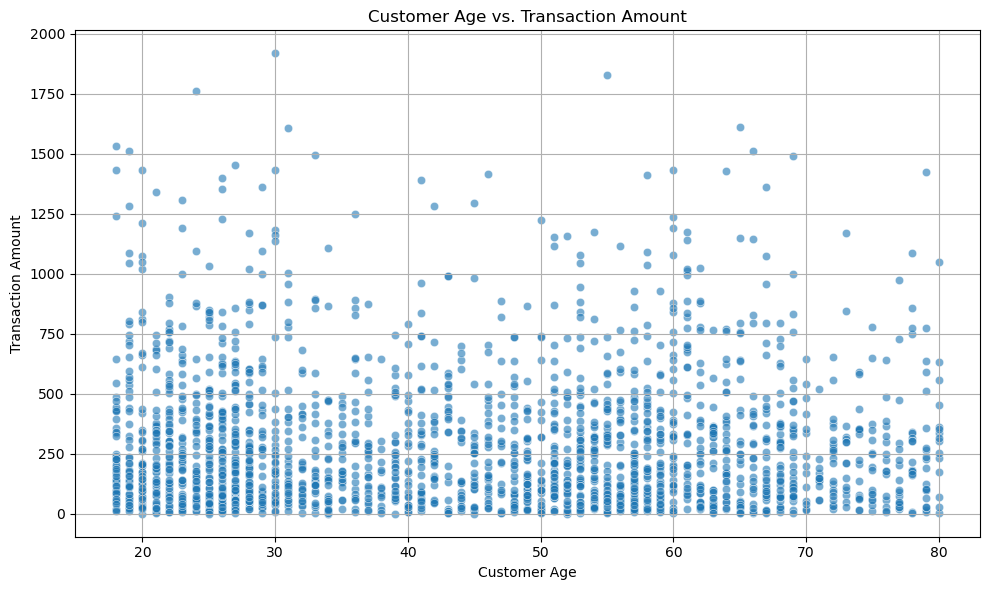

In [32]:
# Age vs. Transaction Amount
plt.figure(figsize=(10,6))
sns.scatterplot(x='customerage', y='transactionamount', data=df, alpha=0.6)
plt.title("Customer Age vs. Transaction Amount")
plt.xlabel("Customer Age")
plt.ylabel("Transaction Amount")
plt.grid(True)
plt.tight_layout()
plt.show()
